# Exercise 2

In this assignment, you will find numerical solutions to the diffusion equation. In particular, you will use an implicit method, and consider problems with both Dirichlet and Neumann boundary conditions.

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Problem Overview

The 1D diffusion equation is :

$$\frac{\partial u}{\partial t} = k\frac{\partial^2 u}{\partial x^2}$$

You should discretize this equation onto $N_x$ space points, with separation $\Delta x = h$, and into timesteps $\Delta t = \tau$.  In the equations below, I use subscript $i$ as a space index, and superscript $n$ for time indices.

Having discretized the problem, you should use the _implicit_ finite difference equation, as discussed in lectures :

$$\frac{u_i^{n+1} - u_i^n}{\tau} = k \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{h^2}$$

This can be written in matrix form $u^n = M u^{n+1}$ using :

$$u_i^n = - \alpha u_{i-1}^{n+1} + (1 + 2\alpha) u_i^{n+1} - \alpha u_{i+1}^{n+1}$$

where $\alpha = \frac{k \tau}{h^2}$.

In the problems below, you are asked to solve the diffusion equation in the context of the heat equation. Here, $k$ is the thermal diffusivity, given by $k = \frac{\lambda}{\rho C}$, where $\lambda$ is the thermal conductivity, $\rho$ is the density, and $C$ is the specific heat capacity. The questions below concern an iron poker of length 50cm.  You may take the thermal conductivity of iron to be a constant 59 W/m/K, its specific heat as 450 J/kg/K, and its density as 7,900 kg/m3.  You can ignore heat loss along the length of the poker.


## Part 1 - Dirichlet Boundary Conditions

The poker is initially in equilibrium, at room temperature of 20 C. At time $t = 0$, one end is thrust into a furnace at 1000 C and the other end is held in an ice bath at 0 C. Your task is to calculate the temperature distribution along the poker as a function of time.

The fact that the ends of the rod are held at fixed temperatures of 0 C and 1000 C corresponds to a Dirichlet boundary condition.  These can be included in the implicit method as follows.

The implicit finite difference equation, above, will allow us to calculate the unknown 'internal' nodes, ie. $0 < i < (N_x-1)$.  However, the boundary nodes, $i=0, N_x$, must have fixed values $d_0, d_N$.  To fix the boundaries, we take the matrix M to be of size $(N_x-2) \times (N_x-2)$, and adding a vector term :

$$u^n = Mu^{n+1} + b$$

For $N_x = 7$ (for example), this gives :

$$M = \pmatrix{
1+2\alpha & -\alpha   &           &           &           & \\
-\alpha   & 1+2\alpha & -\alpha   &           &           & \\
          & -\alpha   & 1+2\alpha & -\alpha   &           & \\
          &           & -\alpha   & 1+2\alpha & -\alpha   & \\
          &           &           & -\alpha   & 1+2\alpha & \\
}$$

$$b = \pmatrix{
-\alpha d_0 \\
0 \\
0 \\
0 \\
-\alpha d_N \\
}$$

You can show this gives the required finite equation for $i=1, (N-1)$, eg. :

$$u^n_1 = - \alpha u^{n+1}_2 + (1 + 2\alpha)u^{n+1}_1 - \alpha d_0$$

First, write functions that will construct the matrix equation and boundary value term.

In [1]:
import numpy as np #importing library to support matrix and arrays
import matplotlib.pyplot as plt #importing package for data visualisation

#physical constants of the Iron poker being modelled
specific_heat_capacity = 450 
thermal_conductivity = 59 
density = 7900 
length = 0.5 #length of poker

k = thermal_conductivity/(density*specific_heat_capacity) #Thermal diffusivity of Iron

In [1]:
def matrix1():
    
    """This function generates a vector that includes the Dirichlet boundary conditions at both ends of the 1D rod."""
    
    lead = np.diag(np.ones(len(x)-2)*(1+2*a),0)  #defining lead diagonal
    lower = np.diag(np.ones(len(x)-3)*(-a),-1)   #defining upper diagonal
    upper = np.diag(np.ones(len(x)-3)*(-a),1)    #defining lower diagonal
    
    matrix = lead + lower + upper
    
    return matrix


def boundary_cons(temperature_1,temperature_2):
    
    """The function returns a vector where the the Dirichlet boundary conditions 
    are applied at both ends of a 1D rod"""
    
    vec = np.zeros(len(x)-2)
    vec[0] = vec[0] - a*temperature_1
    vec[-1] = vec[-1] - a*temperature_2
    
    return vec

Now write a function which will transport the temperature distribution at time step $n$ to time step $n+1$. You will need to use an appropriate linear algebra routine.

In [2]:
import scipy.linalg as linalg

def time_step(temps_0, matrix, bcs):
    
    """Solves heat diffusion eigenvalue problem transporting the temperature distribution 
    at time step n to time step n + 1"""
    
    temps_1 = linalg.solve(matrix, temps_0 - bcs) 
    
    return temps_1

Finally, use the functions above to calculate the temperature distribution as a function of time, and display this graphically using an appropriate plotting routine.

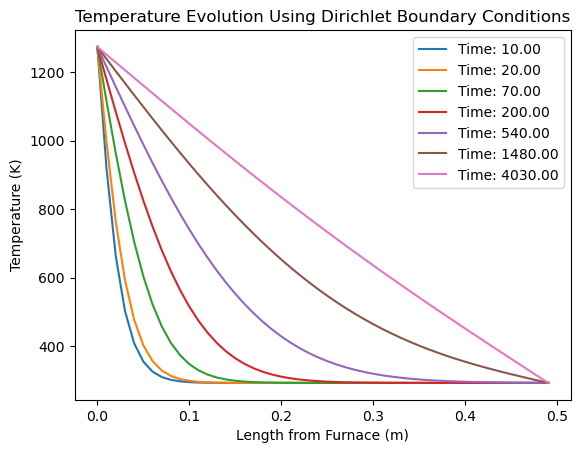

In [4]:
temp_fixed_1 = 293.15
temp_fixed_2 = 1273.15
time = 20000
n_steps = 2000
tau = time/n_steps
h = 0.01 #separation

a = (k*tau)/(h**2)

time_vals = np.arange(0, time, tau)
x = np.arange(0,length,h) 
temp_init = np.ones(len(x))*293.15 #initial temperature
#list of time steps, exponentially increasing with a logarithmic spacing, up to the total time
time_list=[int(np.exp(i)) for i in range(int(np.log(n_steps)))]

#########################################################################################################

matrix_dir = matrix1() 
temp_init1 = np.ones(len(x)-2)*293.15 #initial temperature

temp_arr = np.zeros((len(time_vals), len(x)))
# temp_after = np.zeros((len(x)-2))
temp_arr[0, :] = temp_init

for i, n in enumerate(time_vals):
    temp_init1 = time_step(temp_init1, matrix_dir, boundary_cons(temp_fixed_2,temp_fixed_1))
    temp_arr[i,0] = 1273.15
    temp_arr[i,-1] = 293.15
    temp_arr[i, 1:-1] = temp_init1


fig1, ax1 = plt.subplots()
ax1.set_xlabel('Length from Furnace (m)')
ax1.set_ylabel('Temperature (K)')
ax1.set_title('Temperature Evolution Using Dirichlet Boundary Conditions')


for time_point in time_list:
    ax1.plot(x, temp_arr[time_point])
    
labels = [f"Time: {time_point*tau:.2f}" for time_point in time_list]
ax1.legend(labels, title="")

plt.show()


## Part 2 - Neumann Boundary Conditions

Now we assume the far end of the poker from the furnace is no longer held at 0 C, but instead experiences no heat loss. Again your task is to find the tempeterature distribution as a function of time.

In this case, you will need to implement a Neumann boundary condition at the end of the poker, to ensure the derivative $\frac{\partial u}{\partial x}$ is zero. Since we are using finite differences, this is equivalent to ensuring the final two noces have the same value.

The finite difference equation for node $i=(N-1)$ is :

$$u^n_{N-1} = -\alpha u^{n+1}_{N-2} + (1 + 2\alpha)u^{n+1}_{N-1} - \alpha u^{n+1}_{N}$$

To enforce the Neumann boundary condition we can substitute $u^{n+1}_{N} = u^{n+1}_{N-1}$, giving :

$$u^n_{N-1} = -\alpha u^{n+1}_{N-2} + (1 + \alpha)u^{n+1}_{N-1}$$

This results in a modified form of $M$, shown here for the example $N_x=7$, and the matrix ix $5\times5$ :  

$$M = \pmatrix{
1+2\alpha & -\alpha   &           &           &           & \\
-\alpha   & 1+2\alpha & -\alpha   &           &           & \\
          & -\alpha   & 1+2\alpha & -\alpha   &           & \\
          &           & -\alpha   & 1+2\alpha & -\alpha   & \\
          &           &           & -\alpha   & 1+\alpha & \\
}$$

Note that you will also need to include a boundary term vector $b$, since the end of the poker in the furnace still requires a Dirichlet condition.

First write any new functions you need. You should be able to re-use some functions from Part 1.

In [5]:
def matrix2():
    
    """Function returns a matrix for the internal nodes of the 1D heat equation with one end
    corresponding to the Dirichlet boundary conditions and the other corresponding to Neumann boundary conditions"""
    
    prim = np.ones(len(x)-2)*(1+2*a) #defining values of the leading diagonal
    prim[-1] = 1+a #setting the final element of the leading diagonal to 1+a
        
    #defining interiour diagonals
    lead = np.diag(prim,0)
    lower = np.diag(np.ones(len(x)-3)*(-a),-1) 
    upper = np.diag(np.ones(len(x)-3)*(-a),1)
    
    #constructing a matrix using the interior diagonals
    matrix = lead + lower + upper 

    return matrix

The time at which the total difference between time steps on the log scale shown in the first graph is less than 1e-1 is 30759.37


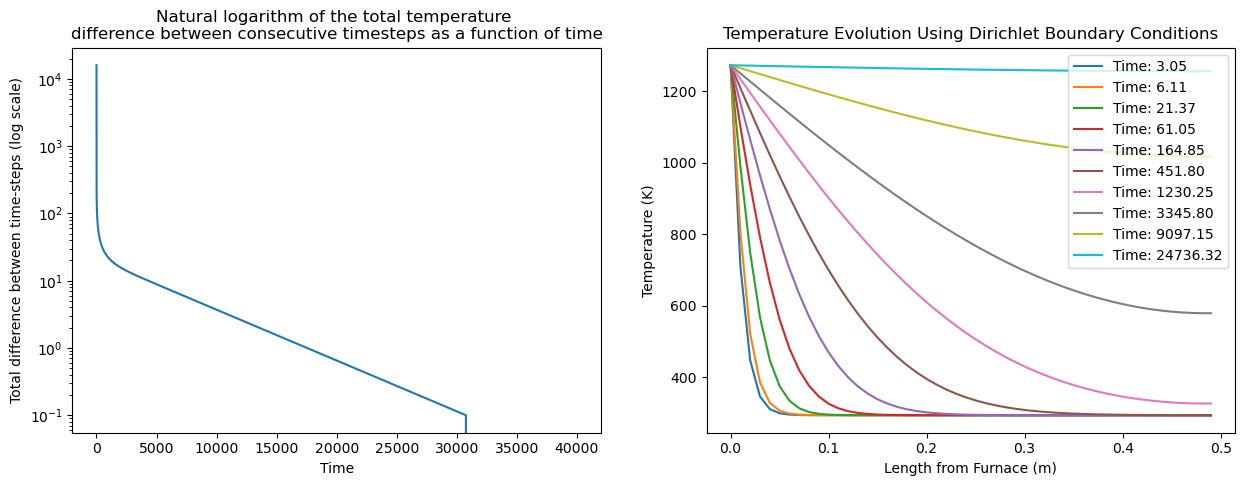

In [6]:
temp_fixed_2 = 0 #temperature on the right side of the poker set to zero so that it does not effect imposed boundary conditions
temp_fixed_1 = 1273.15 #temperature on the left side of the poker

time = 40000 #total time
#list of time steps, exponentially increasing with a logarithmic spacing, up to the total time
time_list=[int(np.exp(i)) for i in range(int(np.log(time)))] 
n_steps = max(time_list)+5000 #number of steps within the total time (used to define time step)
tau = time/n_steps #time step
h = 0.01 #separation between nodes

a = (k*tau)/(h**2) 

#defining arrays of discrete space and time values
time_vals = np.arange(0, time, tau) 
x = np.arange(0,length,h) 

temp_init = np.ones(len(x))*1273.15 # initial temperature

#########################################################################################################

#preallocating memory to increase the speed of the iterative timestep process

temp_arr = np.zeros((len(time_vals), len(x))) #array of temperature values
temp_after = np.ones((len(x)-2))*293.15 #array to store the temperature after the time step calculation for each grid point
temp_arr[0, :] = temp_init #initialising temperature at the first time step to the initial temperature values
tot_list = np.zeros(len(time_vals)) #array to store the total temperature difference between consecutive time steps

threshold = 1e-1 #minimum total temperature difference between consective timesteps before iterations stop
threshold_reached = False #setting boolean value such that when this condition is broken iterations stop



# Iteration over a set of time values, updating the temperature array and calculating the total difference
# between successive temperature arrays until a certain threshold is reached
for i, n in enumerate(time_vals):
    temp_after = time_step(temp_after, matrix2(), boundary_cons(temp_fixed_1,temp_fixed_2))
    temp_arr[i,0] = 1273.15
    temp_arr[i, 1:-1] = temp_after
    #temperature at the right boundary to be the same as the temperature at the second-to-last grid point
    temp_arr[i,-1] = temp_arr[i,-2]  
    diff = temp_arr[i,:] - temp_arr[i-1,:]
    tot_list[i] = np.sum(diff)
    #setting condition to identify the time at which the threshold has been surpassed - loop terminates at this point
    if not threshold_reached and np.log10(abs(tot_list[i])) < np.log10(threshold): 
        threshold_reached = True
        time_to_threshold = i*tau #time for calculations to converge to the set threshold 
        break

        
print(f"The time at which the total difference between time steps on the log scale shown in the first graph is less than 1e-1 is {time_to_threshold:.2f}")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the natural logarithm of the total temperature difference between consecutive time steps as a function of time
ax1.semilogy(time_vals, tot_list)
ax1.set_xlabel('Time')
ax1.set_ylabel('Total difference between time-steps (log scale)')
ax1.set_title('Natural logarithm of the total temperature \ndifference between consecutive timesteps as a function of time')

# Plot of the temperature evolution using Neumann Boundary conditions where timesteps increase exponentially
for time_point in time_list:
    ax2.plot(x, temp_arr[time_point])
ax2.set_xlabel('Length from Furnace (m)')
ax2.set_ylabel('Temperature (K)')
ax2.set_title('Temperature Evolution Using Dirichlet Boundary Conditions')

labels = [f"Time: {time_point*tau:.2f}" for time_point in time_list]
ax2.legend(labels, title="")

plt.show()

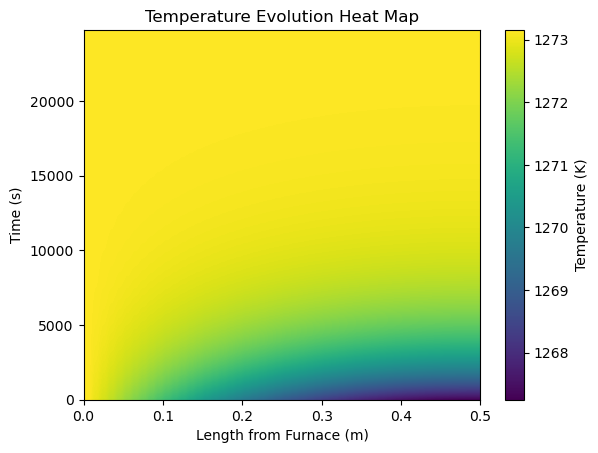

In [7]:
# Plot showing how the temperature of the rod varies with time

for i, n in enumerate(time_vals):
    temp_after = time_step(temp_after, matrix2(), boundary_cons(temp_fixed_1,temp_fixed_2))
    temp_arr[i,0] = 1273.15
    temp_arr[i, 1:-1] = temp_after
    #temperature at the right boundary to be the same as the temperature at the second-to-last grid point
    temp_arr[i,-1] = temp_arr[i,-2] 
fig, ax = plt.subplots()
ax.set_xlabel('Length from Furnace (m)')
ax.set_ylabel('Time (s)')
ax.set_title('Temperature Evolution Heat Map')
im = ax.imshow(temp_arr, extent=[0, length, 0, time_list[-1]*tau], origin='lower', aspect='auto')
cbar = fig.colorbar(im)
cbar.set_label('Temperature (K)')
plt.show()



In [8]:
import plotly.graph_objects as go #importing library for animated data visualisation 
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()


#redefining previously described constants and arrays
temp_fixed_1 = 1273.15 
temp_fixed_2 = 0


time = 25000 

n_steps = 1000
tau = time/n_steps
h = 0.01 
a = (k*tau)/(h**2) 

time_vals = np.arange(0, time, tau) 
x = np.arange(0,length,h) 

temp_init = np.ones(len(x))*1273.15
temp_arr = np.zeros((len(time_vals), len(x))) 
temp_after = np.ones((len(x)-2))*293.15
temp_arr[0, :] = temp_init 

#########################################################################################################

# Iteration over a set of time values, updating the temperature array
for i, n in enumerate(time_vals):
    temp_after = time_step(temp_after, matrix2(), boundary_cons(temp_fixed_1,temp_fixed_2))
    temp_arr[i,0] = 1273.15
    temp_arr[i, 1:-1] = temp_after
    temp_arr[i,-1] = temp_arr[i,-2]

# Creating Plot
fig = go.Figure(data=[go.Scatter(x=np.arange(50), y=temp_arr[0, :], mode='lines')])

# Defining animation frames
frames = [go.Frame(data=[go.Scatter(x=np.arange(50), y=temp_arr[i, :], mode='lines')], name=str(i)) for i in range(1000)]

# Adding the frames to the figure
fig.frames = frames

fig.update_layout(xaxis=dict(range=[0, 50]), yaxis=dict(range=[0, temp_fixed_1+150]))
fig.update_layout(
    xaxis_title="Distance (cm)",
    yaxis_title="Temperature (K)"
)
fig.update_layout(
    sliders=[
        dict(
            active=0,
            currentvalue={"prefix": "Time: "},
            pad={"t": 50},
            steps=[dict(
                    label=str(time_vals[i]),
                    method="animate",
                    args=[[str(i)], 
                          dict(frame=dict(duration=1, redraw=True), fromcurrent=True, transition=dict(duration=0),),],) 
                for i in range(len(time_vals))],)])


# Show the animation
fig.show()

#Double click on the outside box on the left hand column to see the animation 
print("Drag the slider to see the evolution of temperature")

Drag the slider to see the evolution of temperature


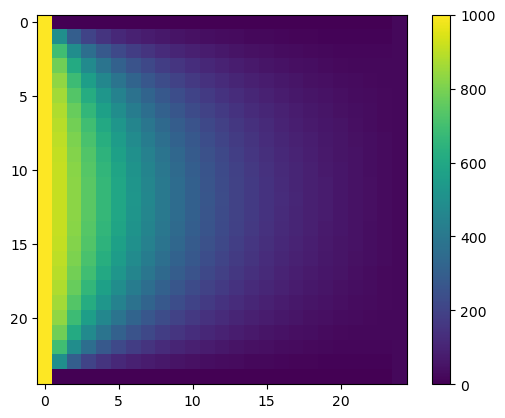

In [10]:
nx, ny = 25,25

# time steps
nt = 500

#temperature matrix
T = np.zeros((nx, ny))

# left and right boundary conditions
T[:,0] = 1000
T[:,-1] = 20

# Compute the heat diffusion
for n in range(nt):
    # exclude the boundary elements in the temperature array,
    T[1:-1,1:-1] = T[1:-1,1:-1]+  k/h**2 * (T[2:,1:-1] + T[:-2,1:-1] - 2*T[1:-1,1:-1]) + \
                   k/h**2 * (T[1:-1,2:] + T[1:-1,:-2] - 2*T[1:-1,1:-1])

# Plot the final temperature distribution
plt.imshow(T)
plt.colorbar()
plt.show()


## Finally, use the functions above to calculate the temperature distribution as a function of time, and display this graphically using a sensible plotting function.

# Part 3

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.

### Mathematical explanations to the assignment:

The first part involved obtaining solutions to the 1D Heat Equation:

$$\frac{\partial u}{\partial t} = k\frac{\partial^2 u}{\partial x^2}$$ 

which satisfy the Dirichlet Boundary conditions (the value of the solution defined on the boundary) and Neumann boundary conditions (value of derivative defined on boundary). 

This was done using the implicit finite difference equation: 

$$\frac{u_i^{n+1} - u_i^n}{\tau} = k \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{h^2}  $$ 

This equation can be rearranged to obtain:

$$u_i^n = - \alpha u_{i-1}^{n+1} + (1 + 2\alpha) u_i^{n+1} - \alpha u_{i+1}^{n+1}$$ 



This equation was used to construct a Matrix M which represents the internal nodes of the 1D poker. Subsequently the equation could be written in the form on a eigenvalue equation which can be used to implicitly solve the heat diffusion equation by finding the temperature of the node at the previous time step $u^{n}$

$$u^n = Mu^{n+1} + b$$ 

(where b represents the imposed boundary conditions)

### Summary
Numpy library was installed to support the handeling of arrays and matplotlib.pyplot was installed to support data visualisation. 

The assignment involved creating a matrix and boundary terms to iteratively solve the heat diffusion equation to obtain the temperature evolution over a time range. In part 1 Dirichlet boundary conditions (setting the ends of the rod at constant temperature) were employed whereas in part 2 one Dirichlet boundary condtions were used at one end of the rod and at the other Neumann boundary conditions were used maintating zero flux out of the rod.

The heat diffusion eigenvalue equation was rearranged 

$$u^n-b= Mu^{n+1}$$ 

and solved by importing and using scipy.linalg.solve. The evolution of heat diffusion along the rod over time was achieved by utilising a time-stepping loop.

The results from the Dirichlet boundary conditions showed the temperature across the rod to approach a constant gradient from one end to the other.

The results from the Neumann diffusion showed the temperature to increase across the whole rod and at approximately 30759.37 it converged to an approximetly uniform temperature where the total difference in temperature between consecutive iterations was less than 1e-1 indicating the solution is reaching a steady state. A graph of the natural logarithm of the total temperature difference between timesteps against the time was plotted. The graph showed that the the natural logarithm of the total temperate difference between time steps and and time varied linearly after approximately 1000 seconds. The total temperature difference between time steps and the time therefore vary exponentially. As a result the time steps were plotted , exponentially increasing with a logarithmic spacing, up to the total time in an attempt to space them equally. This exponential relationship could be explained by the guassian relationship of energy transfer between nearest neighbors as the tail of the guassian varies in an exponential manner.



Note: Use of the method: scipy.linalg.solve was not the optimal method to solve the eigenvalue equation as the heat diffusion matrix with the Dirichlet/Neumann boundary conditions is not symmetric. To improve the efficency of the code a sparse matrix should used along with routines such as linalg.spsolve which employ ARPACK methods (rather than linalg.solves LAPACK routine which specialises in symmetric matricies) to find the solutions of the matrix.